**Building a Student Leave Prediction  Using Machine Learning And Compare Different Model** 

This Notebook compares the performance and root square value of 7 different types of machine learning algorithms for prediction on same dataset with Exploratory Data Analysis done.The goal is to present to you the 7 popular prediction Algorithms.In this notebook we will have the algorithms below:


*   Linear Regression
*   ElasticNet Regression	
*   Support Vector Machines(SVM)
*   Random Forest
*   Extra Tree
*   Gradient Boosted
*   Baseline





The order of the list above doesn't matter here.











In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
stud= pd.read_csv('/content/student-mat.csv')

In [ ]:
print('Total number of students:',len(stud))

Total number of students: 395


In [ ]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
stud.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
stud.columns 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
stud.tail() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
stud.isnull().any() 

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
stud.iplot()

In [ ]:
stud.iplot(kind='box')

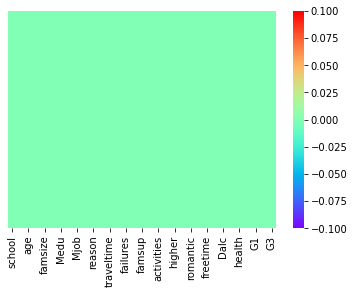

In [ ]:
sns.heatmap(stud.isnull(),cmap="rainbow",yticklabels=False) 

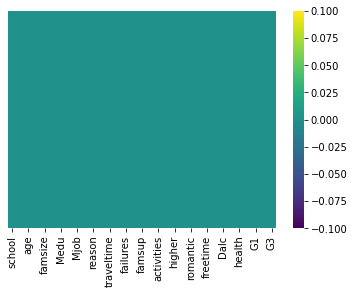

In [ ]:
sns.heatmap(stud.isnull(),cmap="viridis",yticklabels=False)

In [ ]:
f_stud = len(stud[stud['sex'] == 'F'])    
print('Number of female students:',f_stud)
m_stud = len(stud[stud['sex'] == 'M'])    
print('Number of male students:',m_stud)

Number of female students: 208
Number of male students: 187


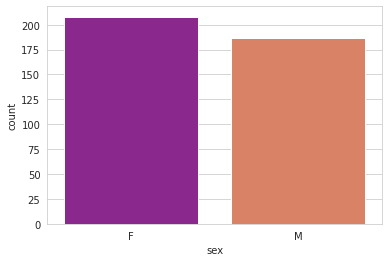

In [ ]:
sns.set_style('whitegrid')    
sns.countplot(x='sex',data=stud,palette='plasma')

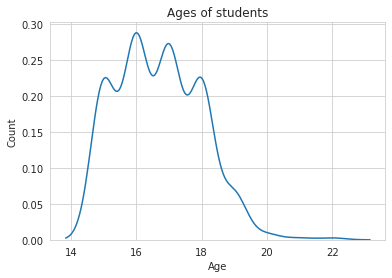

In [ ]:
b = sns.kdeplot(stud['age'])    
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

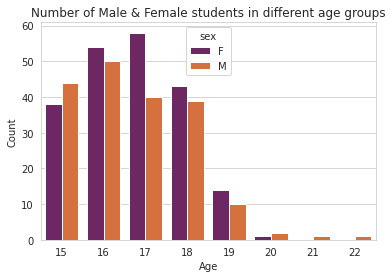

In [ ]:
b = sns.countplot(x='age',hue='sex', data=stud, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

In [ ]:
u_stud = len(stud[stud['address'] == 'U'])   
print('Number of Urban students:',u_stud)
r_stud = len(stud[stud['address'] == 'R'])    
print('Number of Rural students:',r_stud)

Number of Urban students: 307
Number of Rural students: 88


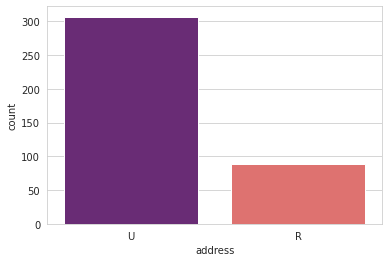

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='address',data=stud,palette='magma')  

In [ ]:
stud.corr()['absences'].sort_values()

Pstatus      -0.134937
sex          -0.066962
studytime    -0.062700
freetime     -0.058078
higher       -0.056085
famrel       -0.044354
health       -0.029937
address      -0.027874
activities   -0.013610
traveltime   -0.012944
paid          0.007435
Fjob          0.008196
nursery       0.019155
schoolsup     0.022526
famsup        0.024353
Fedu          0.024473
G3            0.034247
famsize       0.035783
goout         0.044302
Mjob          0.050254
failures      0.063726
Medu          0.100285
internet      0.101701
Dalc          0.111908
reason        0.116909
Walc          0.136291
romantic      0.153384
guardian      0.163752
age           0.175230
absences      1.000000
Name: absences, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
stud.iloc[:,0]=le.fit_transform(stud.iloc[:,0])
stud.iloc[:,1]=le.fit_transform(stud.iloc[:,1])
stud.iloc[:,3]=le.fit_transform(stud.iloc[:,3])
stud.iloc[:,4]=le.fit_transform(stud.iloc[:,4])
stud.iloc[:,5]=le.fit_transform(stud.iloc[:,5])
stud.iloc[:,8]=le.fit_transform(stud.iloc[:,8])
stud.iloc[:,9]=le.fit_transform(stud.iloc[:,9])
stud.iloc[:,10]=le.fit_transform(stud.iloc[:,10])
stud.iloc[:,11]=le.fit_transform(stud.iloc[:,11])
stud.iloc[:,15]=le.fit_transform(stud.iloc[:,15])
stud.iloc[:,16]=le.fit_transform(stud.iloc[:,16])
stud.iloc[:,17]=le.fit_transform(stud.iloc[:,17])
stud.iloc[:,18]=le.fit_transform(stud.iloc[:,18])
stud.iloc[:,19]=le.fit_transform(stud.iloc[:,19])
stud.iloc[:,20]=le.fit_transform(stud.iloc[:,20])
stud.iloc[:,21]=le.fit_transform(stud.iloc[:,21])
stud.iloc[:,22]=le.fit_transform(stud.iloc[:,22])

In [ ]:
stud = stud.drop(['school', 'G1', 'G2'], axis='columns')

In [ ]:
most_correlated = stud.corr().abs()['absences'].sort_values(ascending=False)
most_correlated = most_correlated[:9]
most_correlated

absences    1.000000
age         0.175230
guardian    0.163752
romantic    0.153384
Walc        0.136291
Pstatus     0.134937
reason      0.116909
Dalc        0.111908
internet    0.101701
Name: absences, dtype: float64

Text(0.5, 1.0, 'Go Out vs leave taken(absences)')

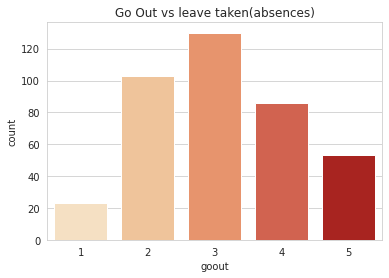

In [ ]:
b = sns.countplot(x=stud['goout'],palette='OrRd')
b.axes.set_title('Go Out vs leave taken(absences)')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



Text(0.5, 1.0, 'Romantic Relationship vs leave taken(G3)')

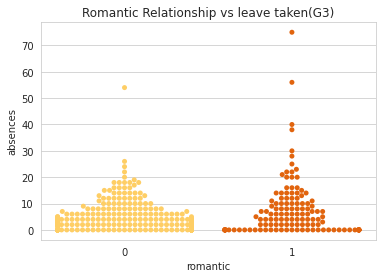

In [ ]:
b = sns.swarmplot(x=stud['romantic'],y=stud['absences'],palette='YlOrBr')
b.axes.set_title('Romantic Relationship vs leave taken(G3)')

In [ ]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(stud, stud['absences'], test_size = 0.25, random_state=42)

In [ ]:
X_train.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
16,0,16,1,0,1,4,4,3,3,3,...,1,0,3,2,3,1,2,2,6,14
66,1,15,1,0,0,4,4,2,3,3,...,1,1,1,3,3,5,5,3,4,12
211,1,17,1,1,1,4,4,3,2,1,...,1,1,5,3,5,4,5,3,13,13
7,0,17,1,0,0,4,4,2,4,1,...,0,0,4,1,4,1,1,1,6,6
19,1,16,1,1,1,4,3,1,2,1,...,1,0,3,1,3,1,3,5,4,10


In [ ]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [ ]:
# find the median
median_pred = X_train['absences'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [ ]:
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [ ]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('absences', axis='columns')
    X_test = X_test.drop('absences', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [ ]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,4.831122,6.492865
ElasticNet Regression,4.660673,6.030849
Random Forest,4.496162,6.139212
Extra Trees,4.730606,6.729996
SVM,3.762923,5.879558
Gradient Boosted,4.20494,5.936745
Baseline,4.20202,6.081932


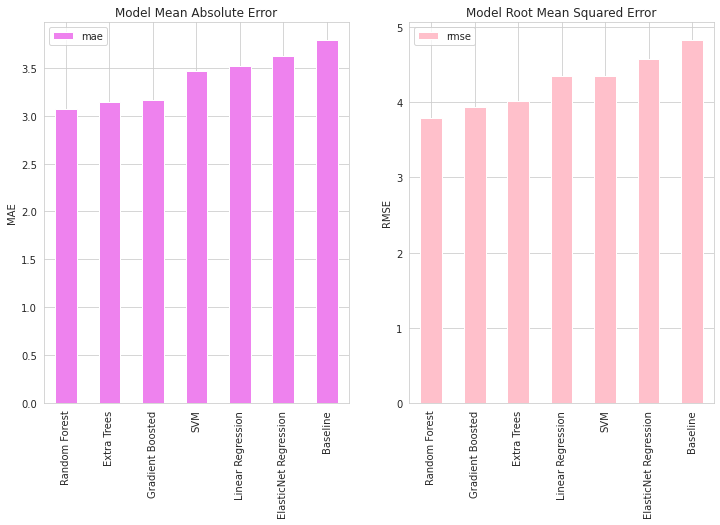

In [ ]:
plt.figure(figsize=(12, 7))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'violet', ax = ax)
plt.title('Model Mean Absolute Error') 
plt.ylabel('MAE')

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'pink', ax = ax)
plt.title('Model Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()

From the above metrices, We conclude that using a combination of Random Forest,Extra Trees,Gradient Boosted,SVM,Linear Regression,ElasticNet Regression,Baseline are used to compare based on MSE and RMSE
value


Conclusion: As we see both Model Mean Absolute Error & Model Root Mean Squared Error that the linear regression is performing the best in both cases